# EDA, FE and Logistic Regression Model (Breast Cancer Dataset)

### 1. EDA and FE
    1. Data Profiling
    2. Stastical analysis
    3. Graphical Analysis
    4. Data Cleaning
    5. Data Scaling

### 2. Logistic Regression Model (Classification)
    1. Logistic Regression Model
    2. Performance metrics for above model
## Dataset: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

<h1 style="color: red;">1.0 Importing required libraries</h1>

In [5]:
### Pandas and Numpy
import pandas as pd
import numpy as np
### Visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
### For Q-Q Plot
import scipy.stats as stats
### To ignore warnings
import warnings
warnings.filterwarnings('ignore')
### Machine Learning libraries
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
### To be able to see maximum columns on screen
pd.set_option('display.max_columns', 500)
### To save the model
import pickle


In [6]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [7]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 

In [8]:
type(breast_cancer_wisconsin_diagnostic)

ucimlrepo.dotdict.dotdict

In [9]:
dataset = pd.concat([X, y], axis=1)

dataset.shape

(569, 31)

In [10]:
dataset.head()

radius1  texture1  perimeter1   area1  smoothness1  compactness1  \
0    17.99     10.38      122.80  1001.0      0.11840       0.27760   
1    20.57     17.77      132.90  1326.0      0.08474       0.07864   
2    19.69     21.25      130.00  1203.0      0.10960       0.15990   
3    11.42     20.38       77.58   386.1      0.14250       0.28390   
4    20.29     14.34      135.10  1297.0      0.10030       0.13280   

   concavity1  concave_points1  symmetry1  fractal_dimension1  radius2  \
0      0.3001          0.14710     0.2419             0.07871   1.0950   
1      0.0869          0.07017     0.1812             0.05667   0.5435   
2      0.1974          0.12790     0.2069             0.05999   0.7456   
3      0.2414          0.10520     0.2597             0.09744   0.4956   
4      0.1980          0.10430     0.1809             0.05883   0.7572   

   texture2  perimeter2   area2  smoothness2  compactness2  concavity2  \
0    0.9053       8.589  153.40     0.006399       0.04904     0.05373   
1    0.7339       3.398   74.08     0.005225       0.01308     0.01860   
2    0.7869       4.585   94.03     0.006150       0.04006     0.03832   
3    1.1560       3.445   27.23     0.009110       0.07458     0.05661   
4    0.7813       5.438   94.44     0.011490       0.02461     0.05688   

   concave_points2  symmetry2  fractal_dimension2  radius3  texture3  \
0          0.01587    0.03003            0.006193    25.38     17.33   
1          0.01340    0.01389            0.003532    24.99     23.41   
2          0.02058    0.02250            0.004571    23.57     25.53   
3          0.01867    0.05963            0.009208    14.91     26.50   
4          0.01885    0.01756            0.005115    22.54     16.67   

   perimeter3   area3  smoothness3  compactness3  concavity3  concave_points3  \
0      184.60  2019.0       0.1622        0.6656      0.7119           0.2654   
1      158.80  1956.0       0.1238        0.1866      0.2416           0.1860   
2      152.50  1709.0       0.1444        0.4245      0.4504           0.2430   
3       98.87   567.7       0.2098        0.8663      0.6869           0.2575   
4      152.20  1575.0       0.1374        0.2050      0.4000           0.1625   

   symmetry3  fractal_dimension3 Diagnosis  
0     0.4601             0.11890         M  
1     0.2750             0.08902         M  
2     0.3613             0.08758         M  
3     0.6638             0.17300         M  
4     0.2364             0.07678         M

In [11]:
### Getting stastical description of all features
dataset.describe().T

count        mean         std         min         25%  \
radius1             569.0   14.127292    3.524049    6.981000   11.700000   
texture1            569.0   19.289649    4.301036    9.710000   16.170000   
perimeter1          569.0   91.969033   24.298981   43.790000   75.170000   
area1               569.0  654.889104  351.914129  143.500000  420.300000   
smoothness1         569.0    0.096360    0.014064    0.052630    0.086370   
compactness1        569.0    0.104341    0.052813    0.019380    0.064920   
concavity1          569.0    0.088799    0.079720    0.000000    0.029560   
concave_points1     569.0    0.048919    0.038803    0.000000    0.020310   
symmetry1           569.0    0.181162    0.027414    0.106000    0.161900   
fractal_dimension1  569.0    0.062798    0.007060    0.049960    0.057700   
radius2             569.0    0.405172    0.277313    0.111500    0.232400   
texture2            569.0    1.216853    0.551648    0.360200    0.833900   
perimeter2          569.0    2.866059    2.021855    0.757000    1.606000   
area2               569.0   40.337079   45.491006    6.802000   17.850000   
smoothness2         569.0    0.007041    0.003003    0.001713    0.005169   
compactness2        569.0    0.025478    0.017908    0.002252    0.013080   
concavity2          569.0    0.031894    0.030186    0.000000    0.015090   
concave_points2     569.0    0.011796    0.006170    0.000000    0.007638   
symmetry2           569.0    0.020542    0.008266    0.007882    0.015160   
fractal_dimension2  569.0    0.003795    0.002646    0.000895    0.002248   
radius3             569.0   16.269190    4.833242    7.930000   13.010000   
texture3            569.0   25.677223    6.146258   12.020000   21.080000   
perimeter3          569.0  107.261213   33.602542   50.410000   84.110000   
area3               569.0  880.583128  569.356993  185.200000  515.300000   
smoothness3         569.0    0.132369    0.022832    0.071170    0.116600   
compactness3        569.0    0.254265    0.157336    0.027290    0.147200   
concavity3          569.0    0.272188    0.208624    0.000000    0.114500   
concave_points3     569.0    0.114606    0.065732    0.000000    0.064930   
symmetry3           569.0    0.290076    0.061867    0.156500    0.250400   
fractal_dimension3  569.0    0.083946    0.018061    0.055040    0.071460   

                           50%          75%         max  
radius1              13.370000    15.780000    28.11000  
texture1             18.840000    21.800000    39.28000  
perimeter1           86.240000   104.100000   188.50000  
area1               551.100000   782.700000  2501.00000  
smoothness1           0.095870     0.105300     0.16340  
compactness1          0.092630     0.130400     0.34540  
concavity1            0.061540     0.130700     0.42680  
concave_points1       0.033500     0.074000     0.20120  
symmetry1             0.179200     0.195700     0.30400  
fractal_dimension1    0.061540     0.066120     0.09744  
radius2               0.324200     0.478900     2.87300  
texture2              1.108000     1.474000     4.88500  
perimeter2            2.287000     3.357000    21.98000  
area2                24.530000    45.190000   542.20000  
smoothness2           0.006380     0.008146     0.03113  
compactness2          0.020450     0.032450     0.13540  
concavity2            0.025890     0.042050     0.39600  
concave_points2       0.010930     0.014710     0.05279  
symmetry2             0.018730     0.023480     0.07895  
fractal_dimension2    0.003187     0.004558     0.02984  
radius3              14.970000    18.790000    36.04000  
texture3             25.410000    29.720000    49.54000  
perimeter3           97.660000   125.400000   251.20000  
area3               686.500000  1084.000000  4254.00000  
smoothness3           0.131300     0.146000     0.22260  
compactness3          0.211900     0.339100     1.05800  
concavity3            0.226700     0.382900     1.25200  
concave_

In [12]:
### Getting datatypes of all features
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   radius1             569 non-null    float64
 1   texture1            569 non-null    float64
 2   perimeter1          569 non-null    float64
 3   area1               569 non-null    float64
 4   smoothness1         569 non-null    float64
 5   compactness1        569 non-null    float64
 6   concavity1          569 non-null    float64
 7   concave_points1     569 non-null    float64
 8   symmetry1           569 non-null    float64
 9   fractal_dimension1  569 non-null    float64
 10  radius2             569 non-null    float64
 11  texture2            569 non-null    float64
 12  perimeter2          569 non-null    float64
 13  area2               569 non-null    float64
 14  smoothness2         569 non-null    float64
 15  compactness2        569 non-null    float64
 16  concavit

In [13]:
## Getting count of duplicates records in each feature
dataset[dataset.duplicated()].count()

radius1               0
texture1              0
perimeter1            0
area1                 0
smoothness1           0
compactness1          0
concavity1            0
concave_points1       0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothness2           0
compactness2          0
concavity2            0
concave_points2       0
symmetry2             0
fractal_dimension2    0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothness3           0
compactness3          0
concavity3            0
concave_points3       0
symmetry3             0
fractal_dimension3    0
Diagnosis             0
dtype: int64

In [14]:
## Getting count of null values in each feature
dataset.isnull().sum()

radius1               0
texture1              0
perimeter1            0
area1                 0
smoothness1           0
compactness1          0
concavity1            0
concave_points1       0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothness2           0
compactness2          0
concavity2            0
concave_points2       0
symmetry2             0
fractal_dimension2    0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothness3           0
compactness3          0
concavity3            0
concave_points3       0
symmetry3             0
fractal_dimension3    0
Diagnosis             0
dtype: int64

In [15]:
### Getting count of unique values in each feature
dataset.nunique()

radius1               456
texture1              479
perimeter1            522
area1                 539
smoothness1           474
compactness1          537
concavity1            537
concave_points1       542
symmetry1             432
fractal_dimension1    499
radius2               540
texture2              519
perimeter2            533
area2                 528
smoothness2           547
compactness2          541
concavity2            533
concave_points2       507
symmetry2             498
fractal_dimension2    545
radius3               457
texture3              511
perimeter3            514
area3                 544
smoothness3           411
compactness3          529
concavity3            539
concave_points3       492
symmetry3             500
fractal_dimension3    535
Diagnosis               2
dtype: int64

<h1 style="color: green;">3.0 Analysis of Features</h1>
<h2 style="color: green;">3.1 Diagnosis</h2>

<Axes: xlabel='Diagnosis', ylabel='count'>

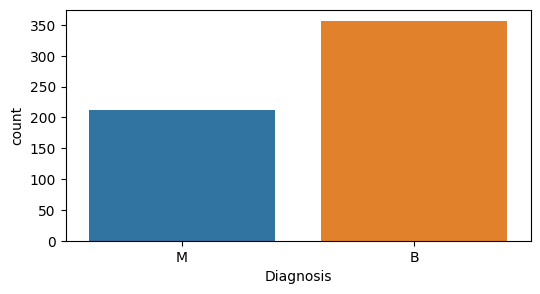

In [16]:
plt.figure(figsize=(6,3))
sns.countplot(data=dataset, x='Diagnosis',label='Category',hue='Diagnosis')

<h2 style="color: orange;">3.2 Numerical features</h2>

In [17]:
### Numerical features 
numerical_feature=[feature for feature in dataset.columns if dataset[feature].dtypes!='O']
print(numerical_feature)

['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1', 'compactness1', 'concavity1', 'concave_points1', 'symmetry1', 'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2', 'smoothness2', 'compactness2', 'concavity2', 'concave_points2', 'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3', 'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3', 'symmetry3', 'fractal_dimension3']


<h2 style="color: orange;">3.3 Checking distribution of Continuous numerical features</h2>

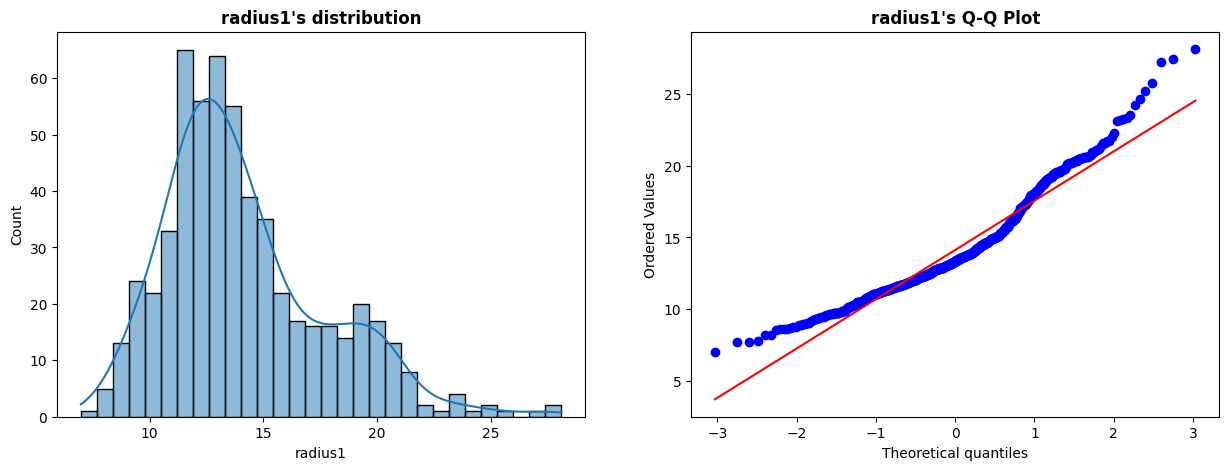

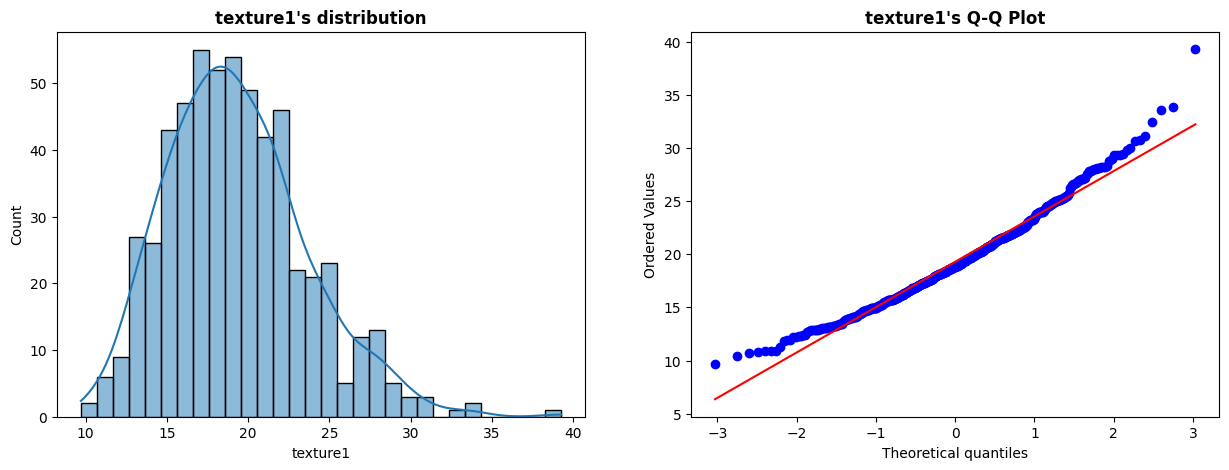

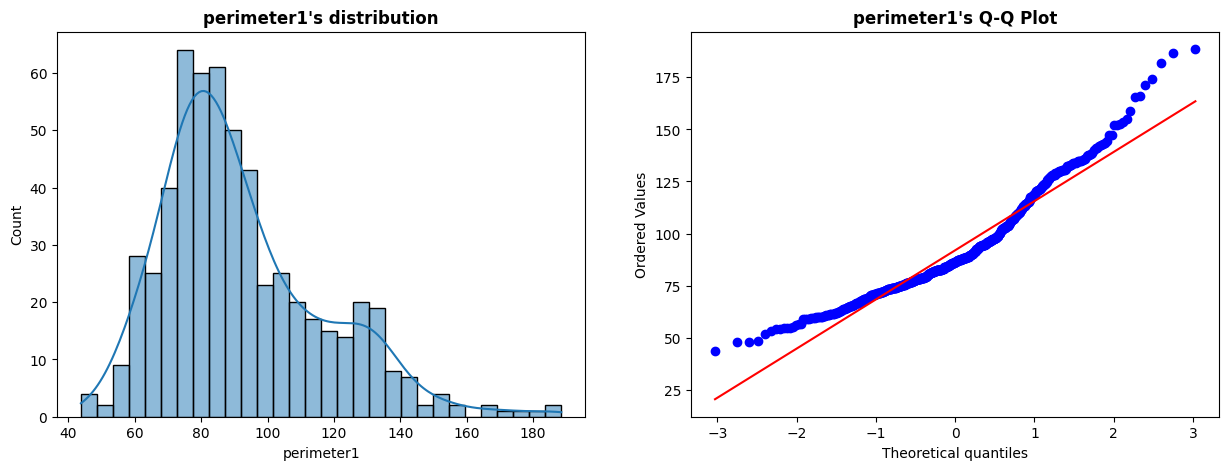

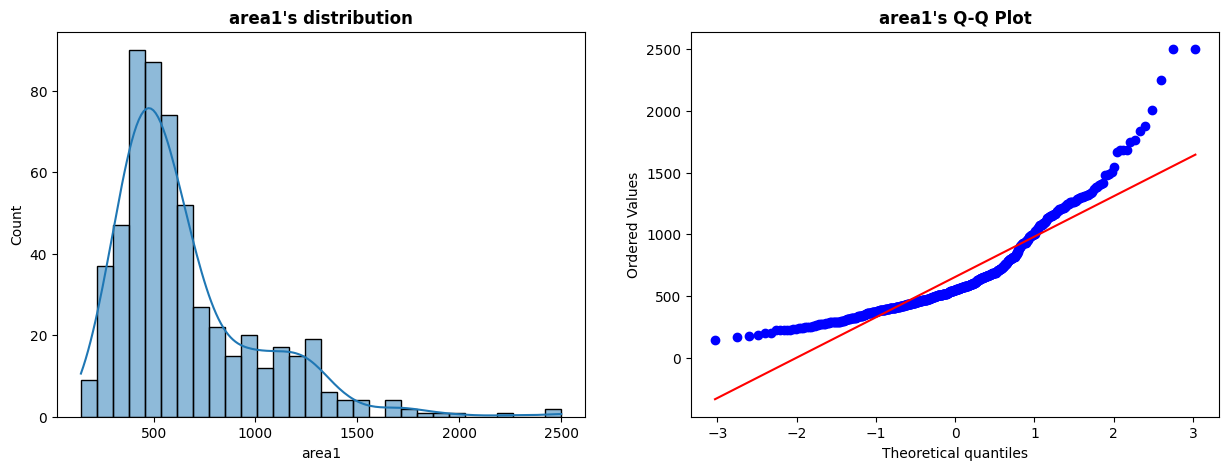

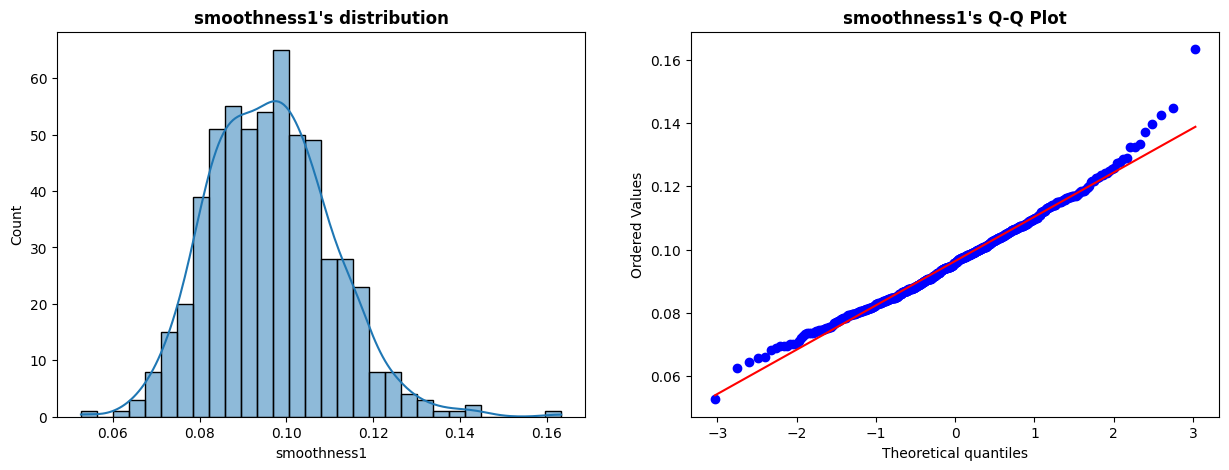

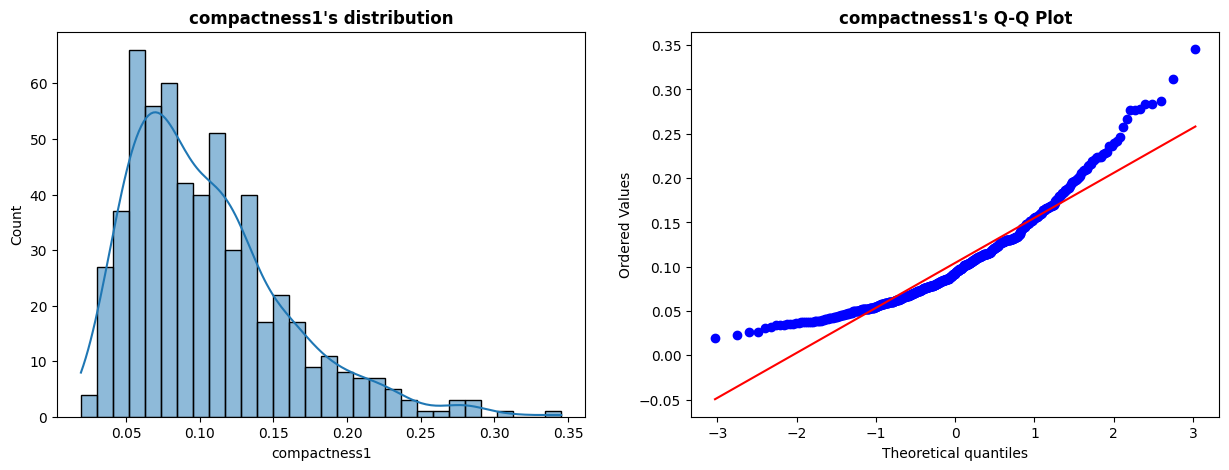

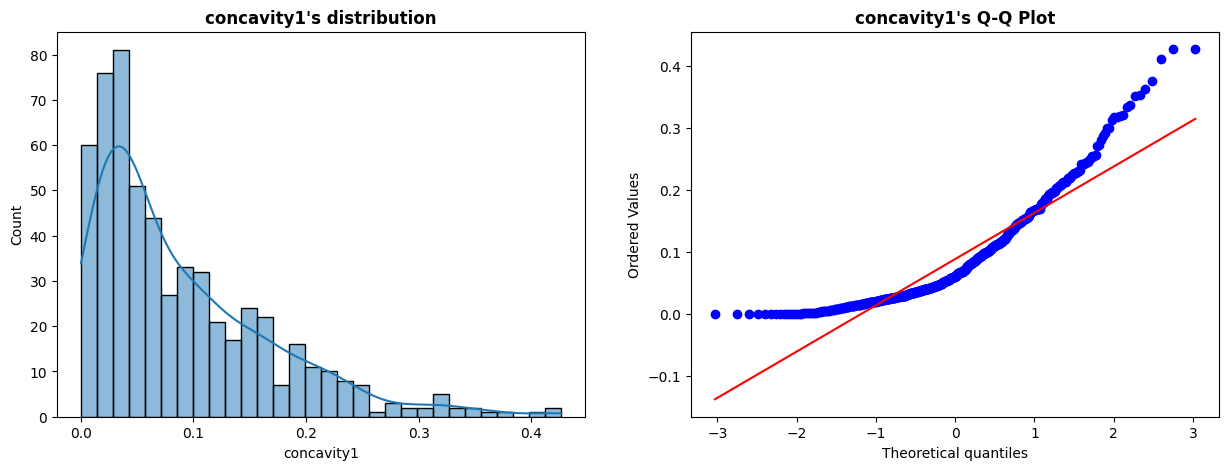

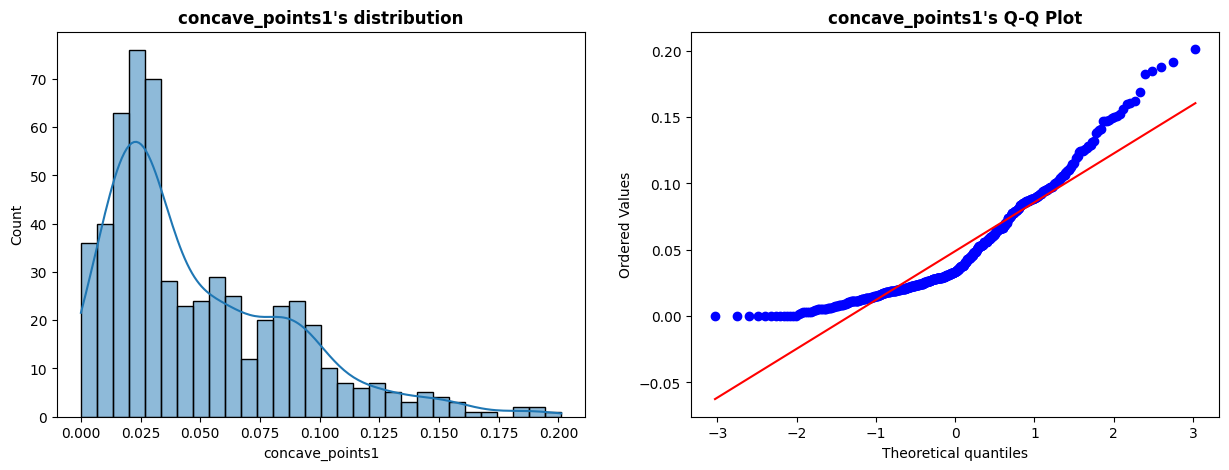

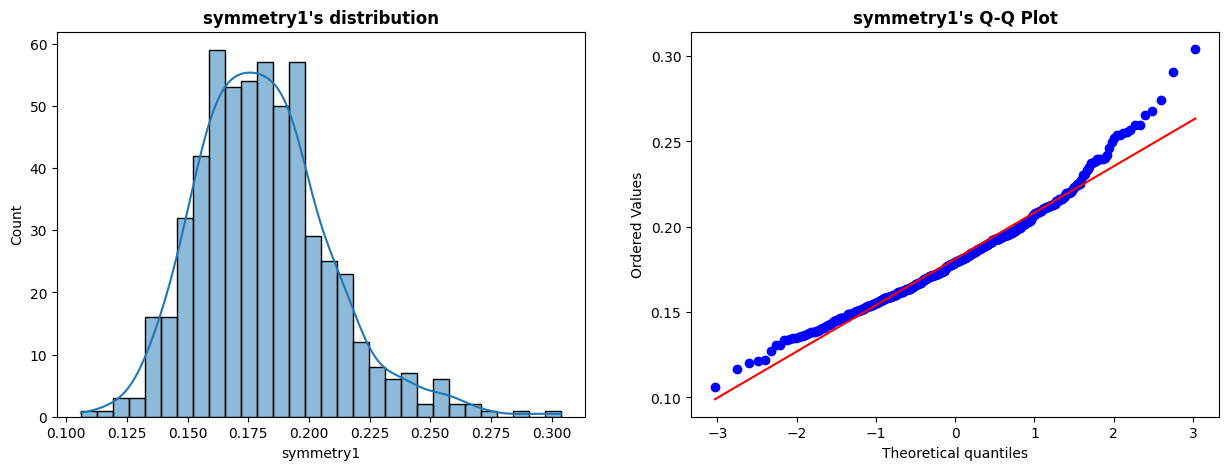

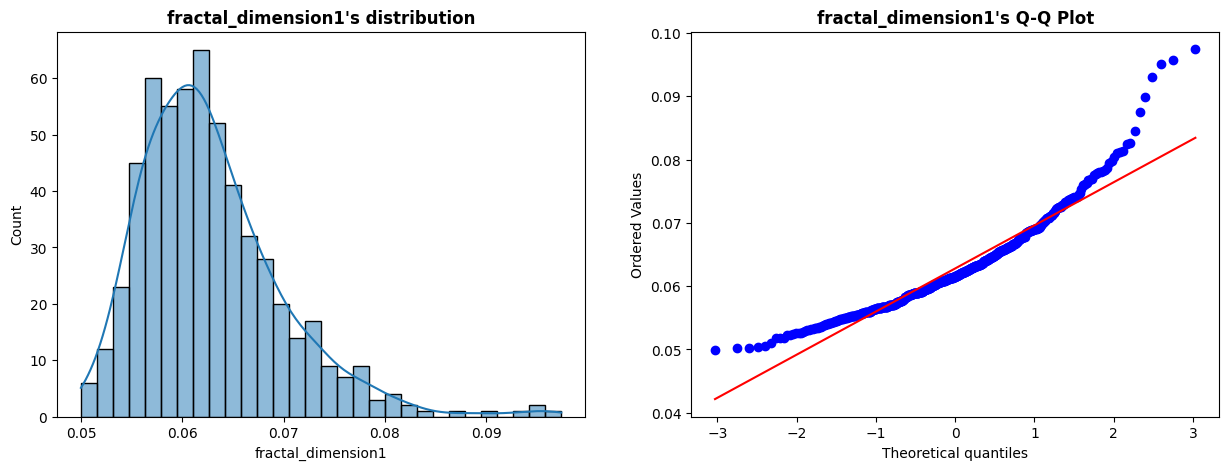

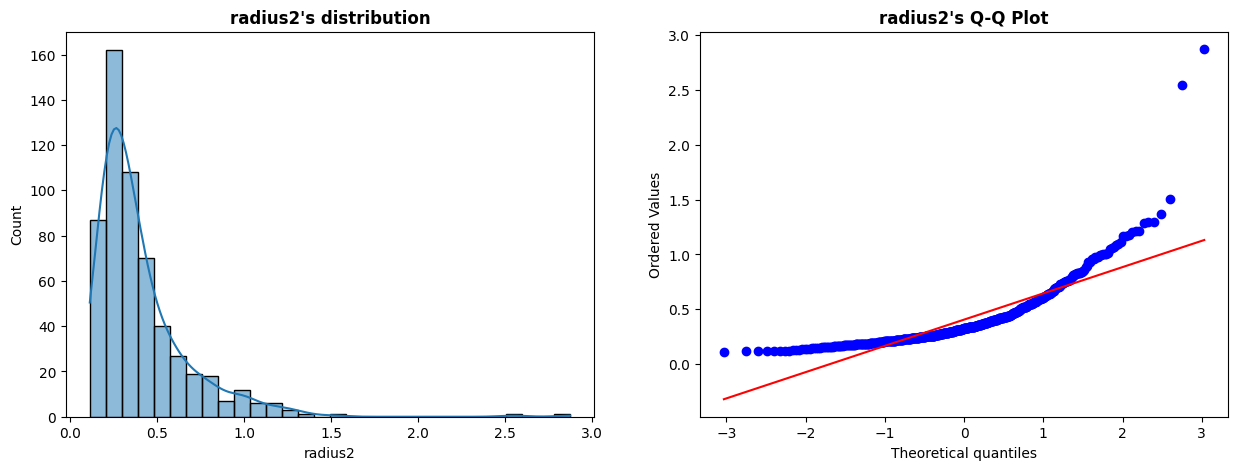

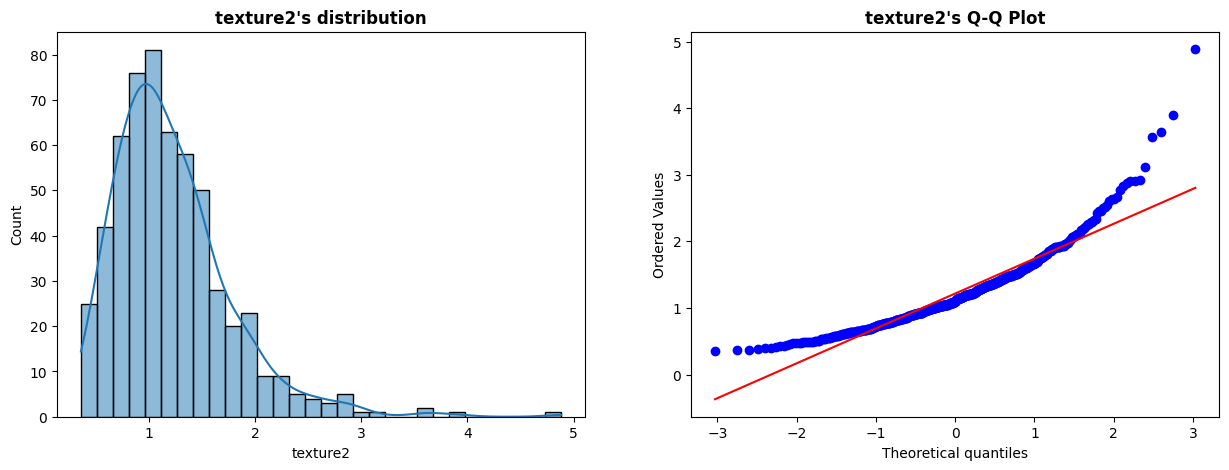

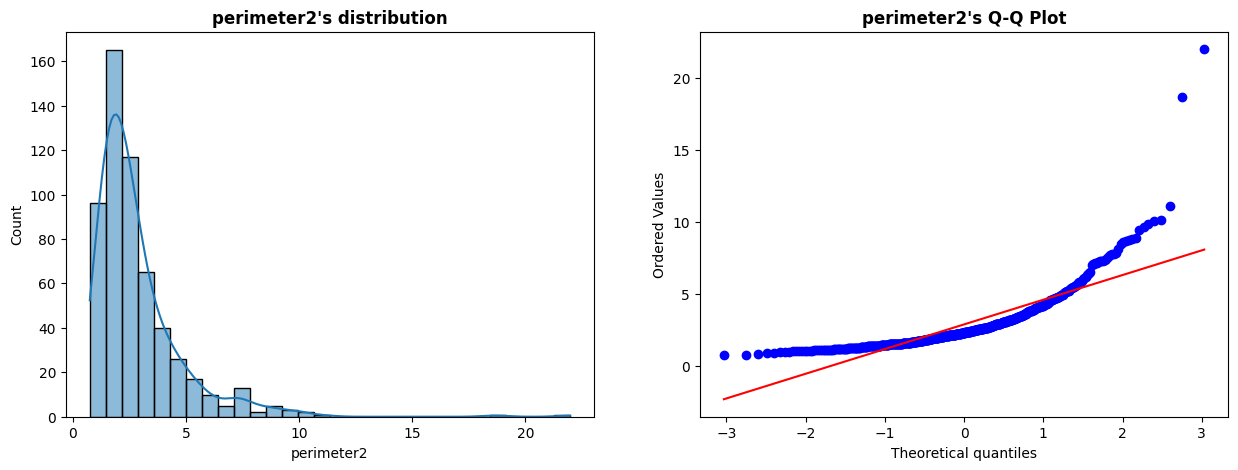

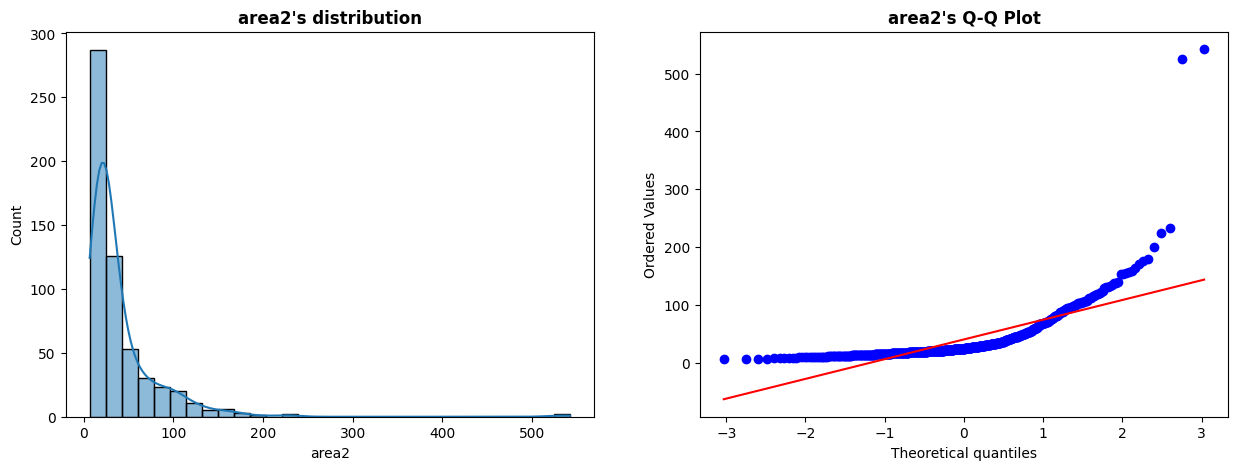

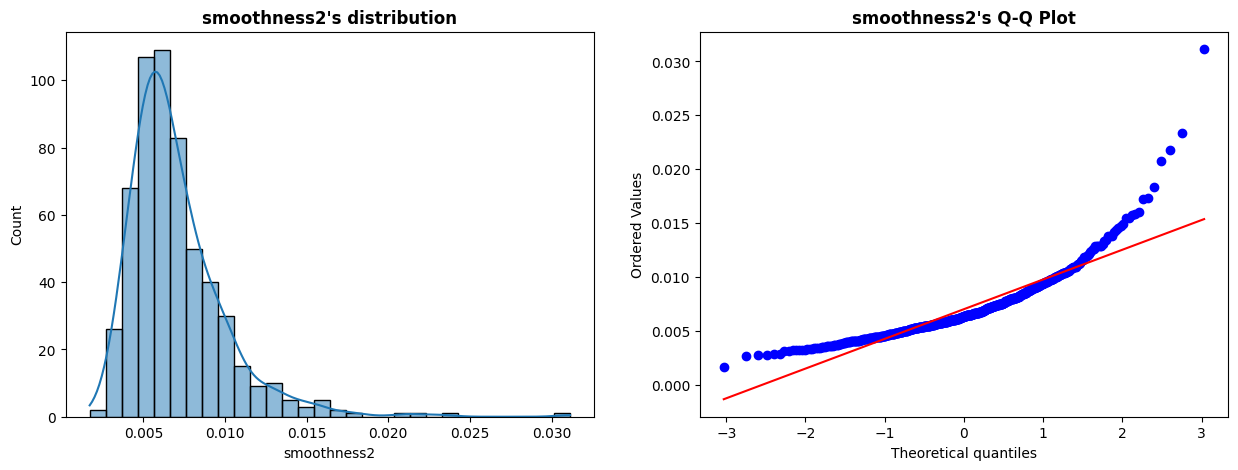

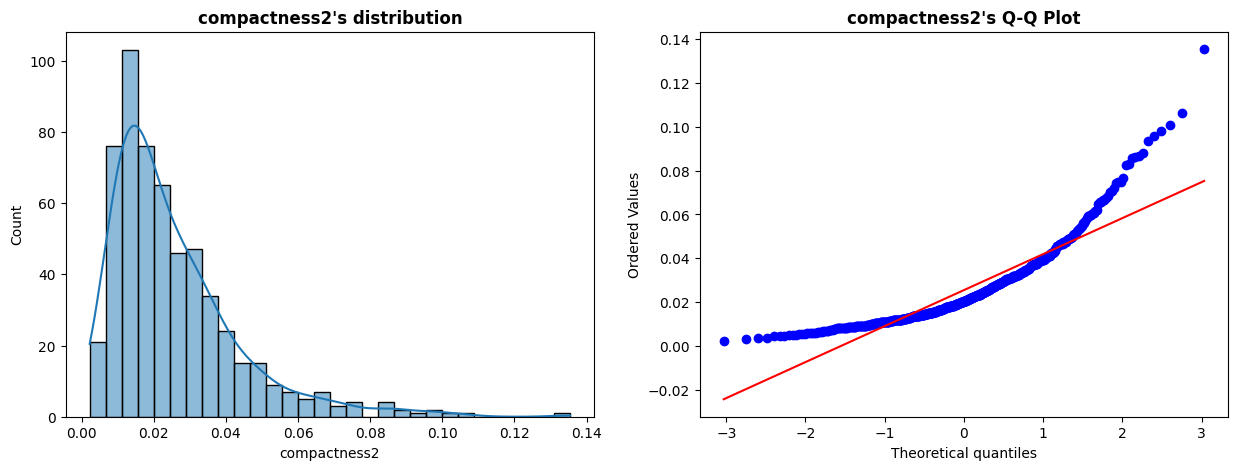

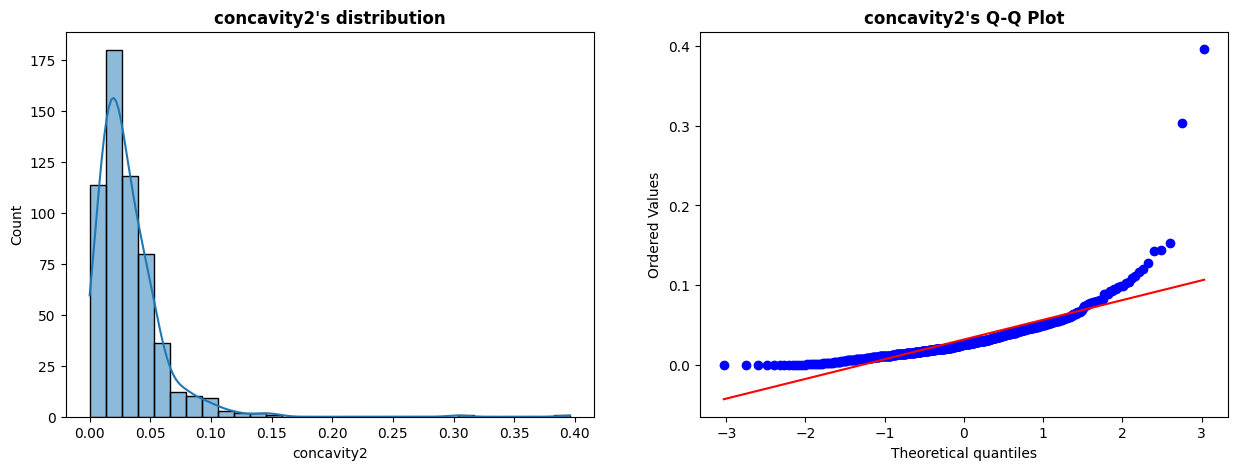

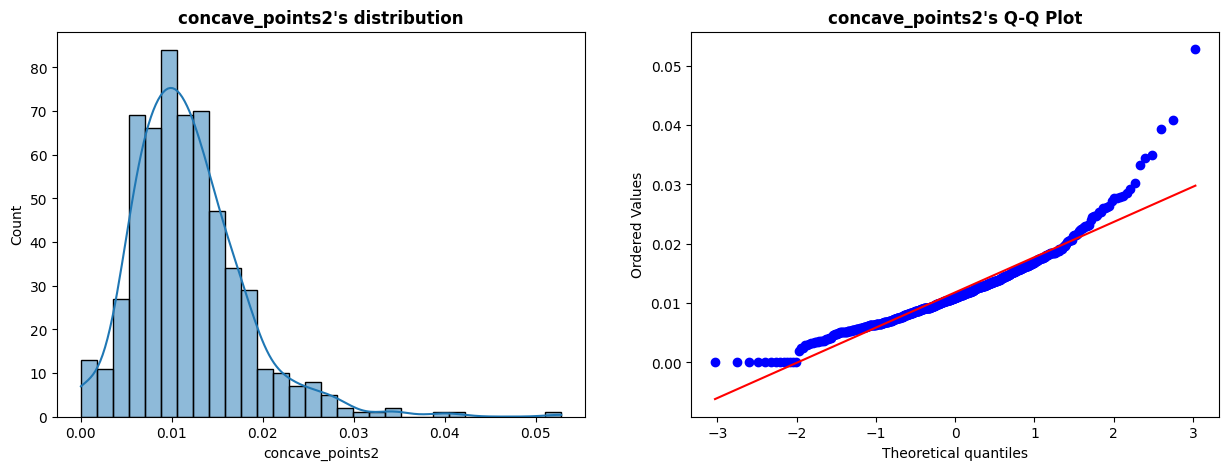

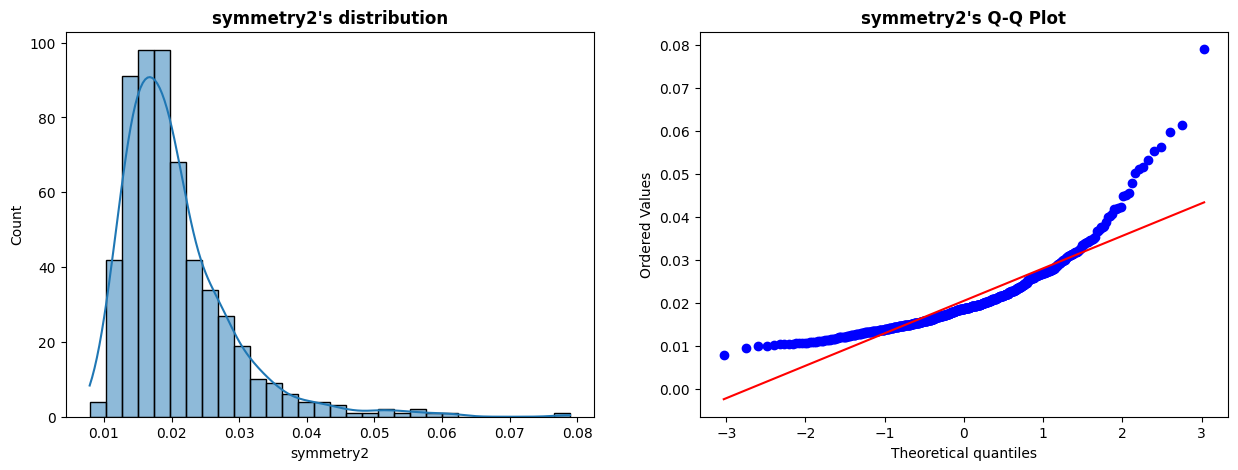

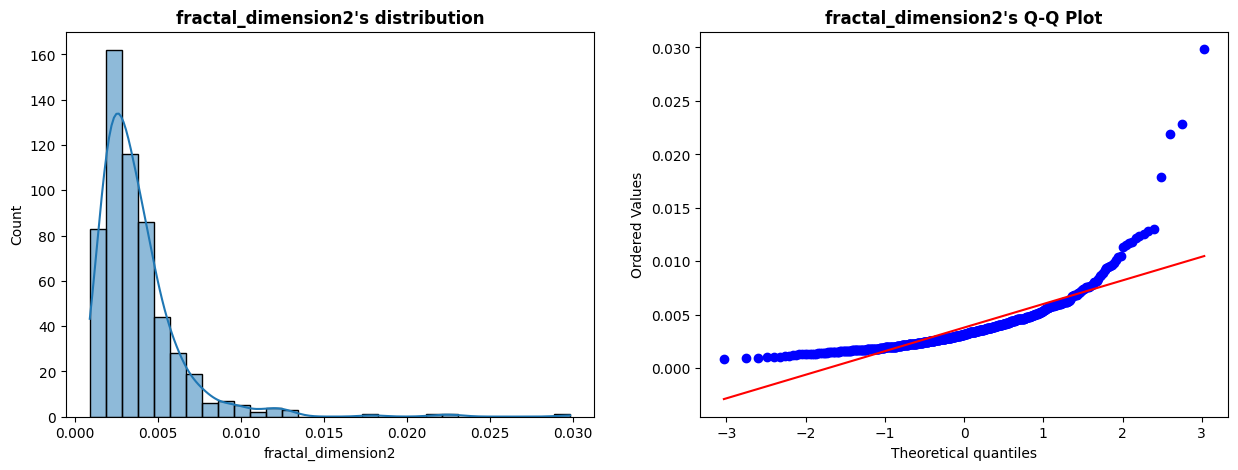

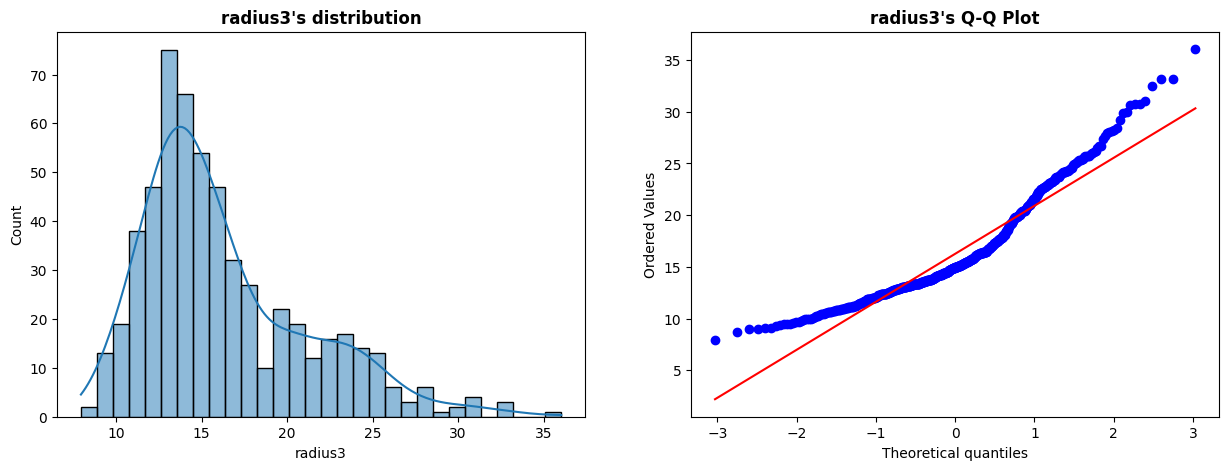

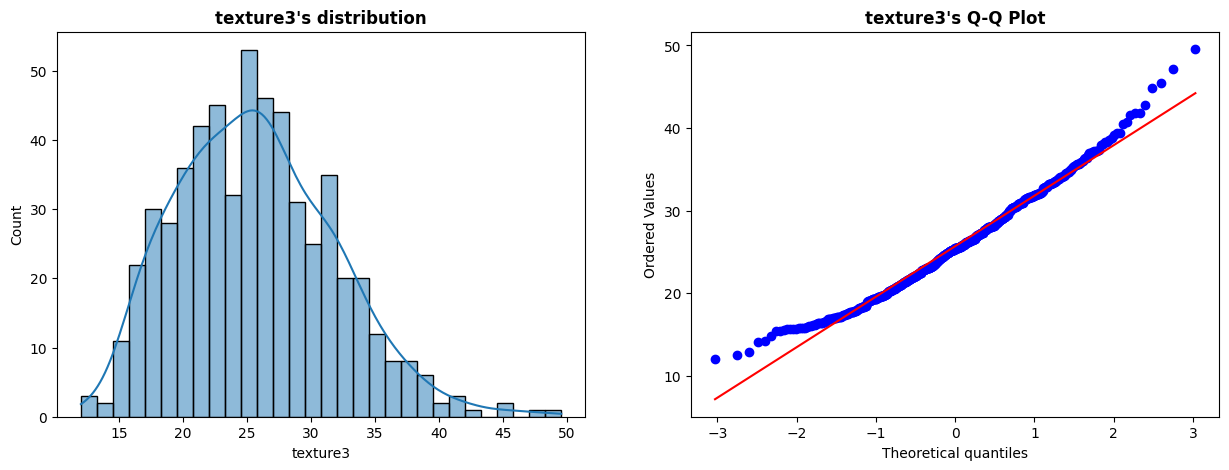

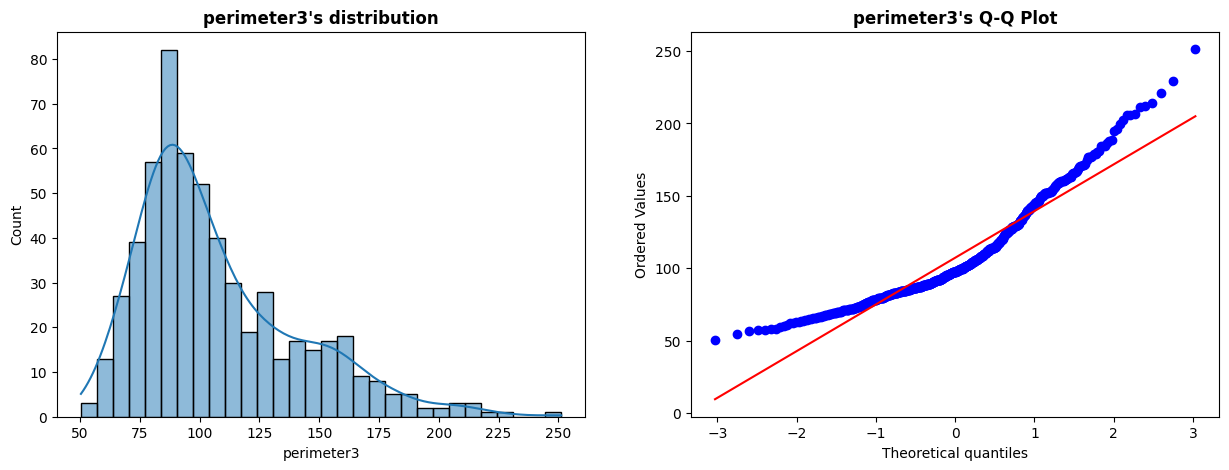

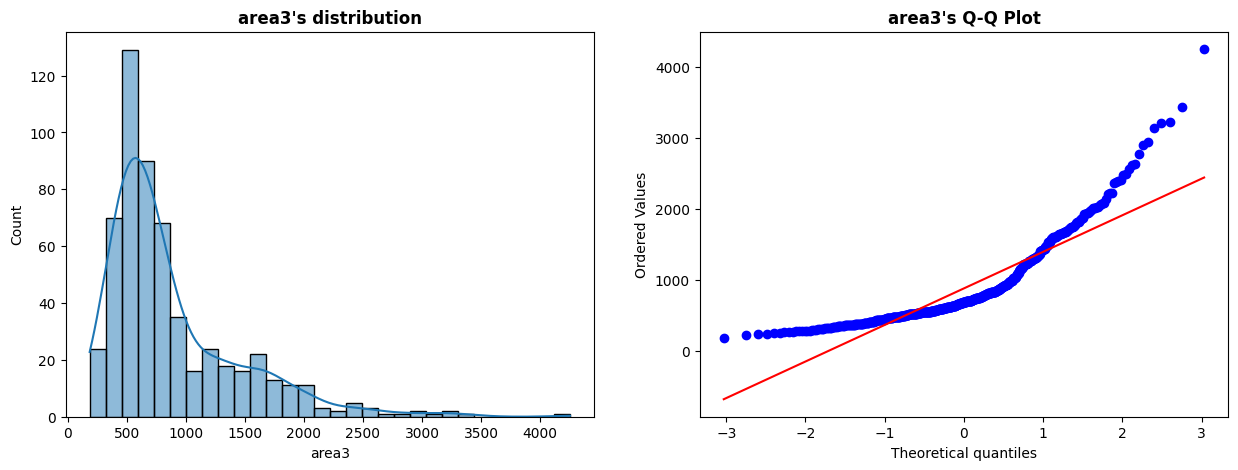

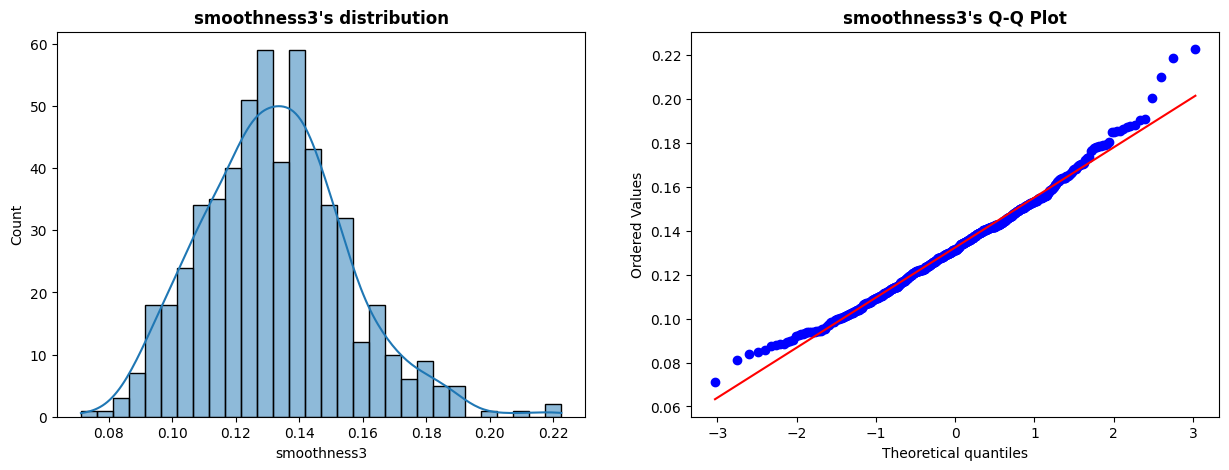

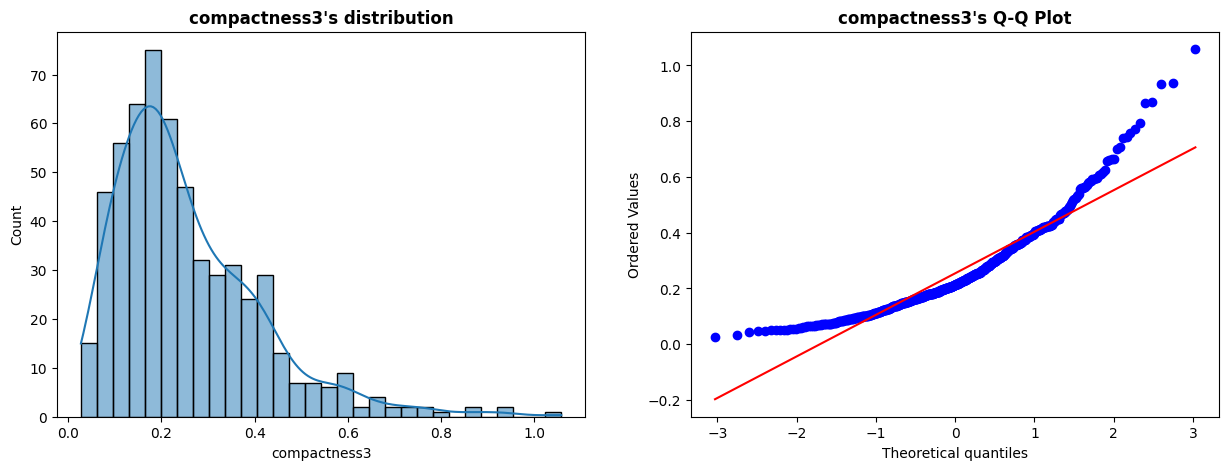

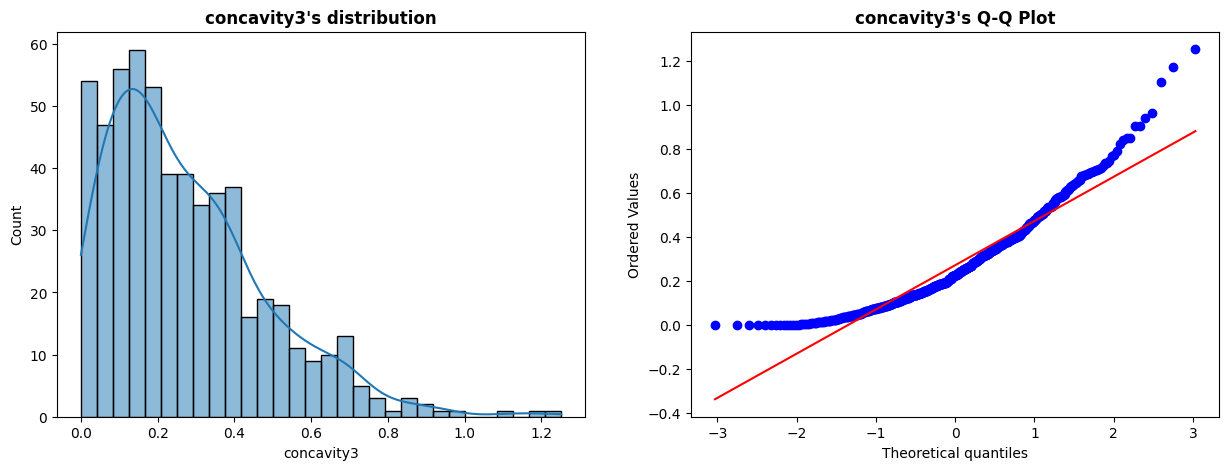

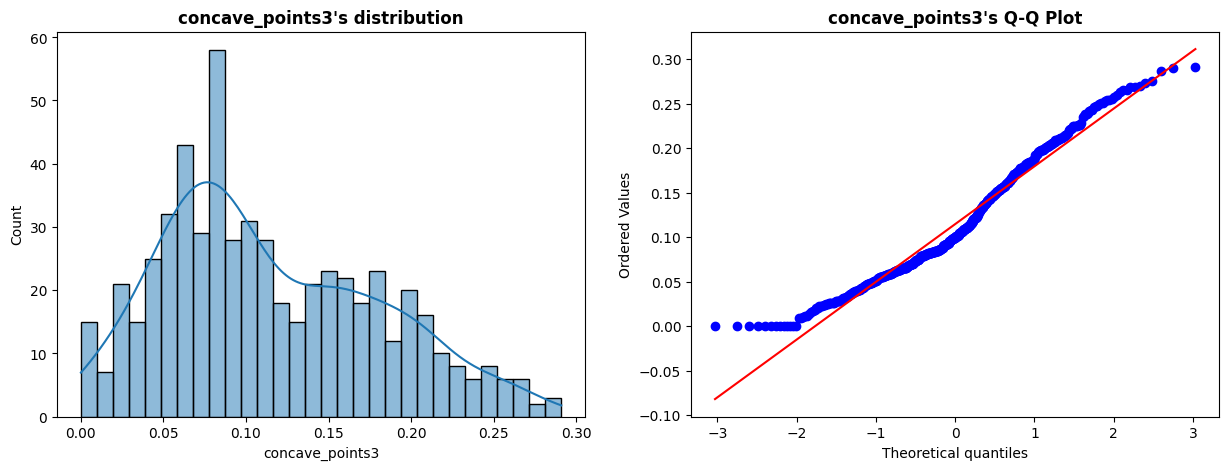

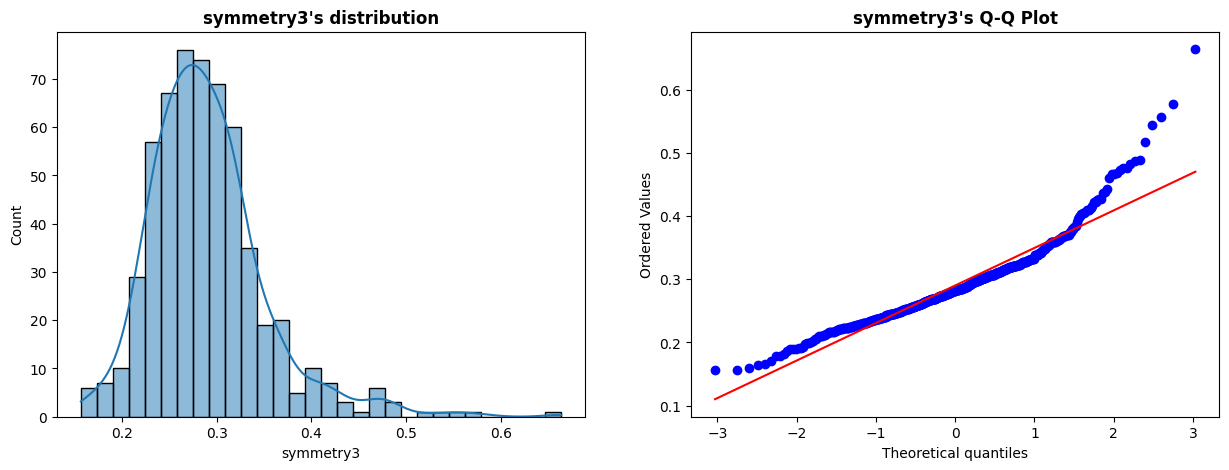

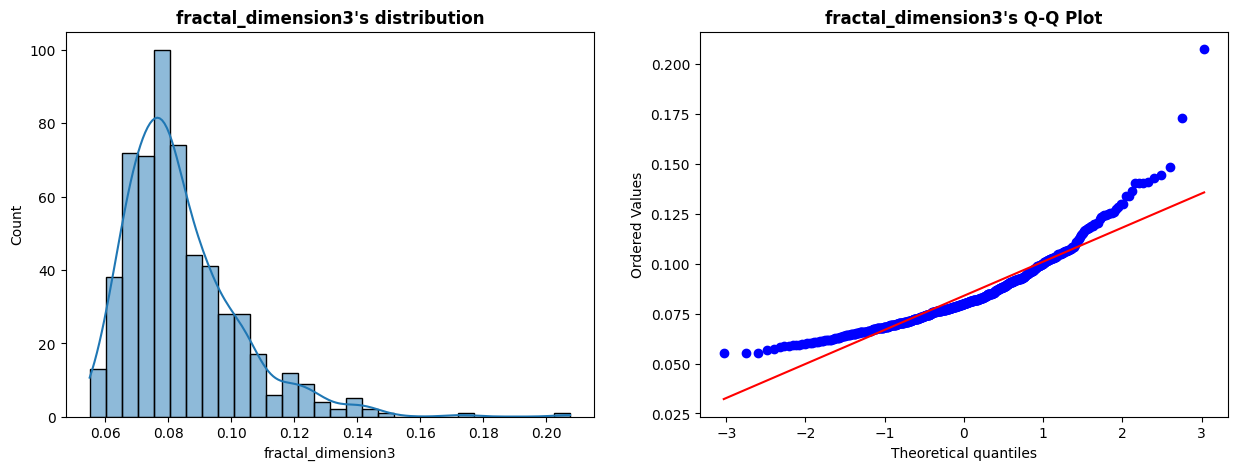

In [18]:
### Checking distribution of Continuous numerical features
for i in numerical_feature:
 plt.figure(figsize=(15,5))
 plt.subplot(121)
 sns.histplot(data=dataset, x=i, kde=True, bins=30)
 plt.title("{}'s distribution".format(i),fontweight="bold")
 
 plt.subplot(122)
 stats.probplot(dataset[i], dist='norm', plot=plt)
 plt.title("{}'s Q-Q Plot".format(i),fontweight="bold")
 plt.show();

<h2 style="color: orange;">3.4 Comparing Continuous numerical features with Classes</h2>

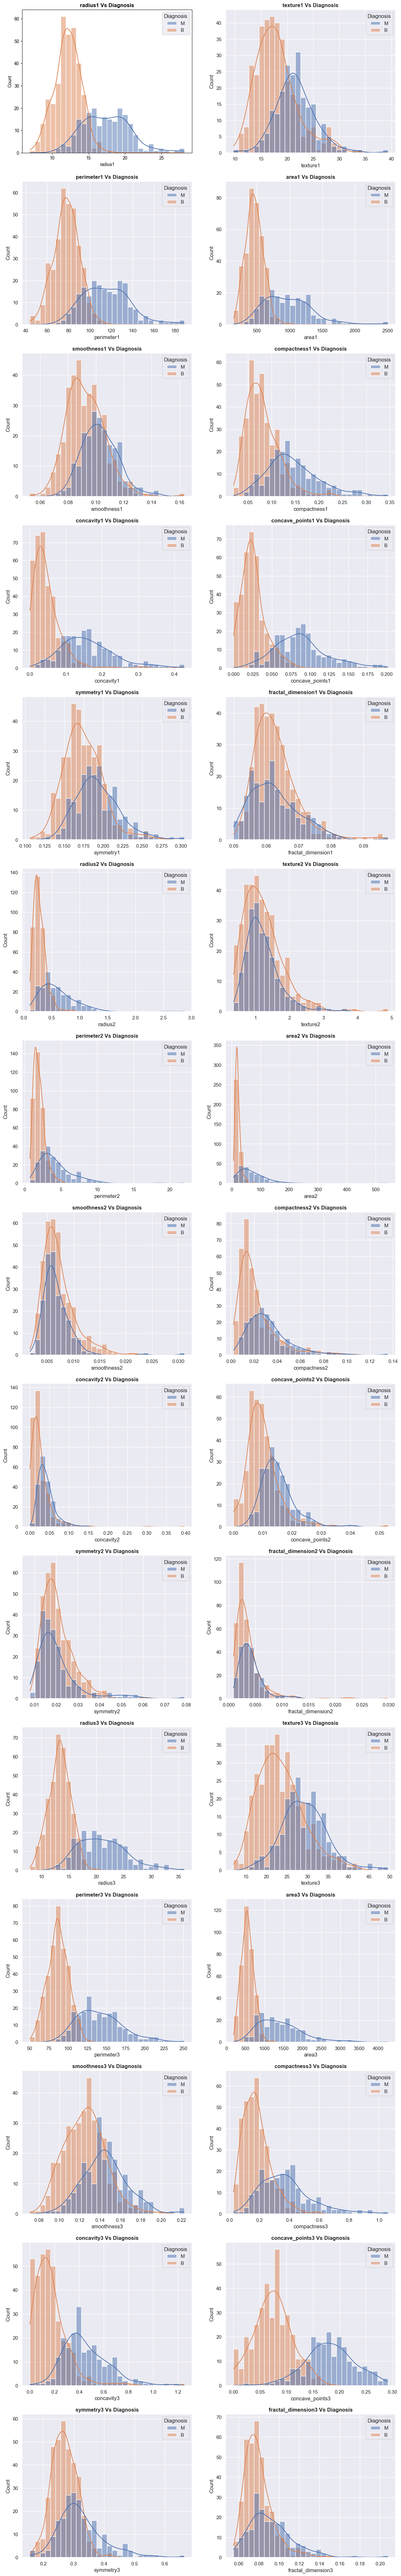

In [19]:
### Comparing Continuous numerical features with Classes
plt.figure(figsize=(15,110))
for i in enumerate(numerical_feature):
 plt.subplot(16, 2, i[0]+1)
 sns.set(rc={'figure.figsize':(7,5)})
 sns.histplot(data=dataset, x=i[1], kde=True, bins=30, color='blue', hue='Diagnosis')
 plt.title("{} Vs Diagnosis".format(i[1]),fontweight="bold")

<h2 style="color: orange;">3.5  Checking outliers in numerical features</h2>

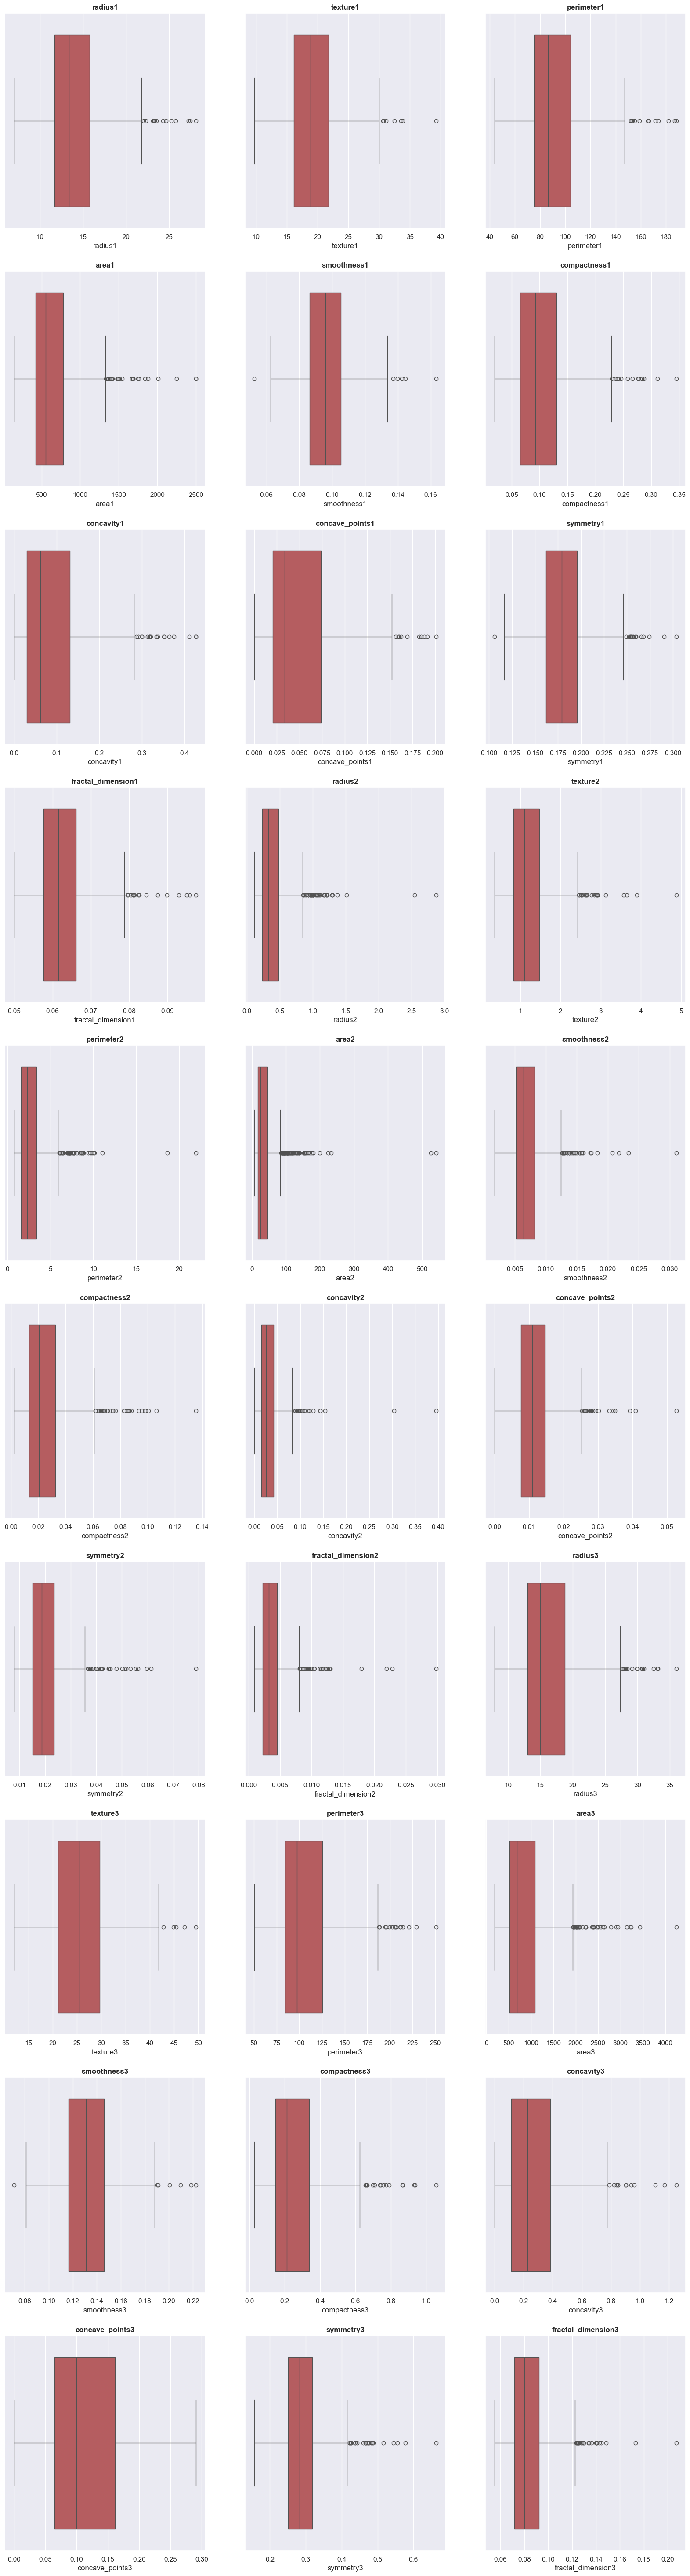

In [20]:
### Checking outliers in numerical features
plt.figure(figsize=(20,75))
for i in enumerate(numerical_feature):
 plt.subplot(10, 3, i[0]+1)
 sns.set(rc={'figure.figsize':(10,6)})
 sns.boxplot(data=dataset, x=i[1], color='r')
 plt.title("{}".format(i[1]), fontweight="bold")


<h1 style="color: orange;">4.0 Checking correlation among the features</h1>

In [21]:
corr = round(dataset[numerical_feature].corr(),2)
corr

radius1  texture1  perimeter1  area1  smoothness1  \
radius1                1.00      0.32        1.00   0.99         0.17   
texture1               0.32      1.00        0.33   0.32        -0.02   
perimeter1             1.00      0.33        1.00   0.99         0.21   
area1                  0.99      0.32        0.99   1.00         0.18   
smoothness1            0.17     -0.02        0.21   0.18         1.00   
compactness1           0.51      0.24        0.56   0.50         0.66   
concavity1             0.68      0.30        0.72   0.69         0.52   
concave_points1        0.82      0.29        0.85   0.82         0.55   
symmetry1              0.15      0.07        0.18   0.15         0.56   
fractal_dimension1    -0.31     -0.08       -0.26  -0.28         0.58   
radius2                0.68      0.28        0.69   0.73         0.30   
texture2              -0.10      0.39       -0.09  -0.07         0.07   
perimeter2             0.67      0.28        0.69   0.73         0.30   
area2                  0.74      0.26        0.74   0.80         0.25   
smoothness2           -0.22      0.01       -0.20  -0.17         0.33   
compactness2           0.21      0.19        0.25   0.21         0.32   
concavity2             0.19      0.14        0.23   0.21         0.25   
concave_points2        0.38      0.16        0.41   0.37         0.38   
symmetry2             -0.10      0.01       -0.08  -0.07         0.20   
fractal_dimension2    -0.04      0.05       -0.01  -0.02         0.28   
radius3                0.97      0.35        0.97   0.96         0.21   
texture3               0.30      0.91        0.30   0.29         0.04   
perimeter3             0.97      0.36        0.97   0.96         0.24   
area3                  0.94      0.34        0.94   0.96         0.21   
smoothness3            0.12      0.08        0.15   0.12         0.81   
compactness3           0.41      0.28        0.46   0.39         0.47   
concavity3             0.53      0.30        0.56   0.51         0.43   
concave_points3        0.74      0.30        0.77   0.72         0.50   
symmetry3              0.16      0.11        0.19   0.14         0.39   
fractal_dimension3     0.01      0.12        0.05   0.00         0.50   

                    compactness1  concavity1  concave_points1  symmetry1  \
radius1                     0.51        0.68             0.82       0.15   
texture1                    0.24        0.30             0.29       0.07   
perimeter1                  0.56        0.72             0.85       0.18   
area1                       0.50        0.69             0.82       0.15   
smoothness1                 0.66        0.52             0.55       0.56   
compactness1                1.00        0.88             0.83       0.60   
concavity1                  0.88        1.00             0.92       0.50   
concave_points1             0.83        0.92             1.00       0.46   
symmetry1                   0.60        0.50             0.46       1.00   
fractal_dimension1          0.57        0.34             0.17       0.48   
radius2                     0.50        0.63             0.70       0.30   
texture2                    0.05        0.08             0.02       0.13   
perimeter2                  0.55        0.66             0.71       0.31   
area2                       0.46        0.62             0.69       0.22   
smoothness2                 0.14        0.10             0.03       0.19   
compactness2                0.74        0.67             0.49       0.42   
concavity2                  0.57        0.69             0.44       0.34   
concave_points2             0.64        0.68             0.62       0.39   
symmetry2                   0.23        0.18             0.10       0.45   
fractal_dimension2          0.51        0.45             0.26       0.33   
radius3                     0.54        0.69             0.83       0.19   
texture3                    0.25        0.30             0.29       0.09   
perimete

<h3 style="color: blue;">4.1 Plotting heatmap</h3>

<Axes: >

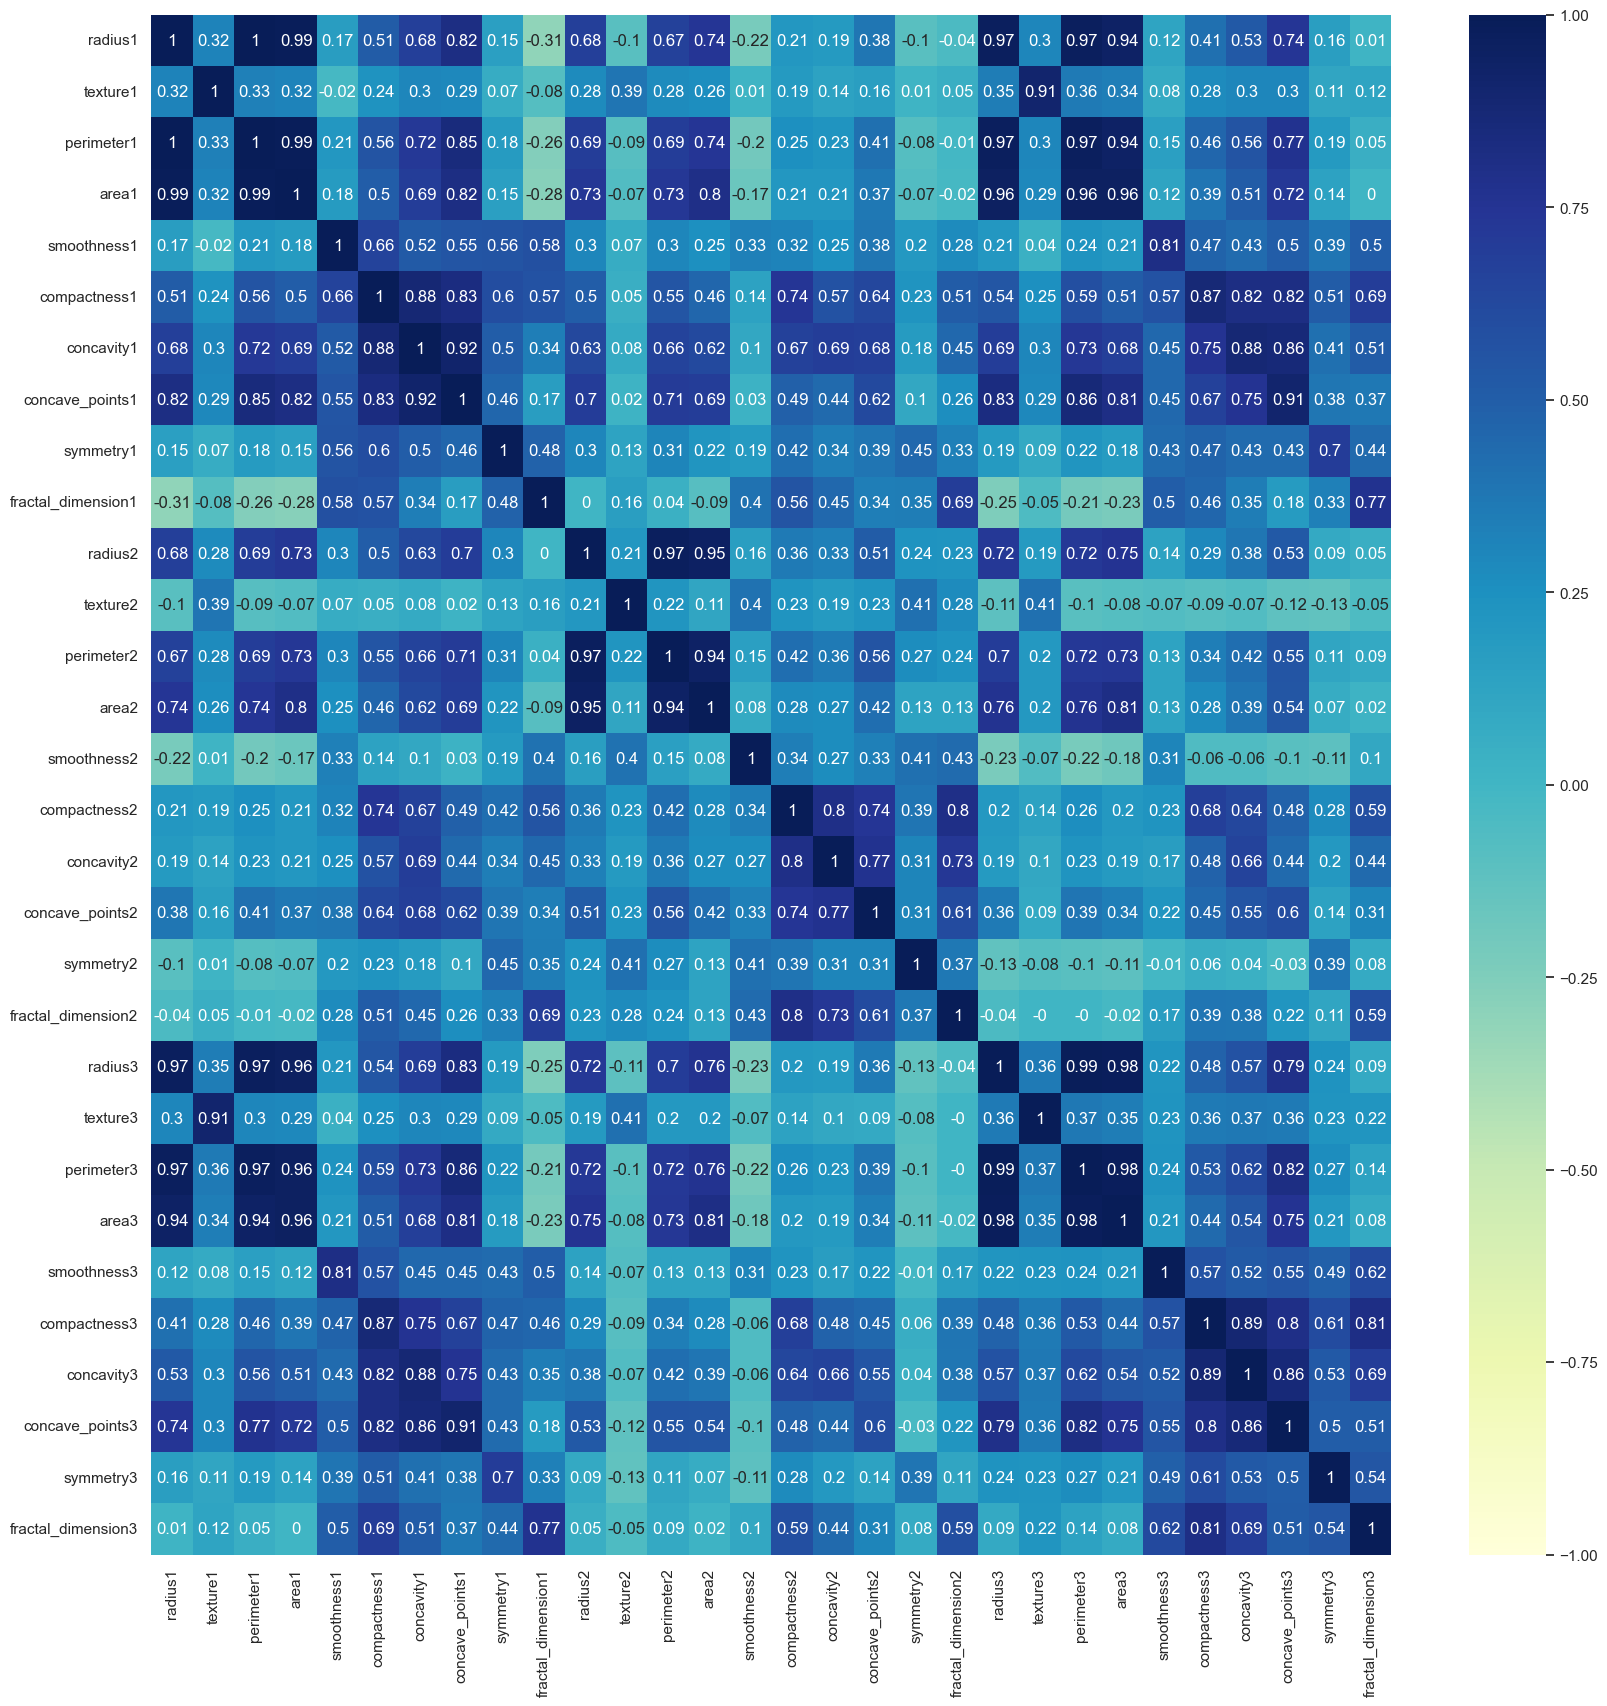

In [22]:
### Plotting heatmap for visualising the correlation between features
sns.set(rc={'figure.figsize':(20,20)})
sns.heatmap(data=corr, annot=True, vmin=-1, vmax=1, cmap="YlGnBu")

In [23]:
data=dataset.copy()

In [24]:
from sklearn.preprocessing import LabelEncoder
# Create a LabelEncoder object
label_encoder = LabelEncoder()

data['Diagnosis']=label_encoder.fit_transform(dataset['Diagnosis'])
data.head(10)

radius1  texture1  perimeter1   area1  smoothness1  compactness1  \
0    17.99     10.38      122.80  1001.0      0.11840       0.27760   
1    20.57     17.77      132.90  1326.0      0.08474       0.07864   
2    19.69     21.25      130.00  1203.0      0.10960       0.15990   
3    11.42     20.38       77.58   386.1      0.14250       0.28390   
4    20.29     14.34      135.10  1297.0      0.10030       0.13280   
5    12.45     15.70       82.57   477.1      0.12780       0.17000   
6    18.25     19.98      119.60  1040.0      0.09463       0.10900   
7    13.71     20.83       90.20   577.9      0.11890       0.16450   
8    13.00     21.82       87.50   519.8      0.12730       0.19320   
9    12.46     24.04       83.97   475.9      0.11860       0.23960   

   concavity1  concave_points1  symmetry1  fractal_dimension1  radius2  \
0     0.30010          0.14710     0.2419             0.07871   1.0950   
1     0.08690          0.07017     0.1812             0.05667   0.5435   
2     0.19740          0.12790     0.2069             0.05999   0.7456   
3     0.24140          0.10520     0.2597             0.09744   0.4956   
4     0.19800          0.10430     0.1809             0.05883   0.7572   
5     0.15780          0.08089     0.2087             0.07613   0.3345   
6     0.11270          0.07400     0.1794             0.05742   0.4467   
7     0.09366          0.05985     0.2196             0.07451   0.5835   
8     0.18590          0.09353     0.2350             0.07389   0.3063   
9     0.22730          0.08543     0.2030             0.08243   0.2976   

   texture2  perimeter2   area2  smoothness2  compactness2  concavity2  \
0    0.9053       8.589  153.40     0.006399       0.04904     0.05373   
1    0.7339       3.398   74.08     0.005225       0.01308     0.01860   
2    0.7869       4.585   94.03     0.006150       0.04006     0.03832   
3    1.1560       3.445   27.23     0.009110       0.07458     0.05661   
4    0.7813       5.438   94.44     0.011490       0.02461     0.05688   
5    0.8902       2.217   27.19     0.007510       0.03345     0.03672   
6    0.7732       3.180   53.91     0.004314       0.01382     0.02254   
7    1.3770       3.856   50.96     0.008805       0.03029     0.02488   
8    1.0020       2.406   24.32     0.005731       0.03502     0.03553   
9    1.5990       2.039   23.94     0.007149       0.07217     0.07743   

   concave_points2  symmetry2  fractal_dimension2  radius3  texture3  \
0          0.01587    0.03003            0.006193    25.38     17.33   
1          0.01340    0.01389            0.003532    24.99     23.41   
2          0.02058    0.02250            0.004571    23.57     25.53   
3          0.01867    0.05963            0.009208    14.91     26.50   
4          0.01885    0.01756            0.005115    22.54     16.67   
5          0.01137    0.02165            0.005082    15.47     23.75   
6          0.01039    0.01369            0.002179    22.88     27.66   
7          0.01448    0.01486            0.005412    17.06     28.14   
8          0.01226    0.02143            0.003749    15.49     30.73   
9          0.01432    0.01789            0.010080    15.09     40.68   

   perimeter3   area3  smoothness3  compactness3  concavity3  concave_points3  \
0      184.60  2019.0       0.1622        0.6656      0.7119           0.2654   
1      158.80  1956.0       0.1238        0.1866      0.2416           0.1860   
2      152.50  1709.0       0.1444        0.4245      0.4504           0.2430   
3       98.87   567.7       0.2098        0.8663      0.6869           0.2575   
4      152.20  1575.0       0.1374        0.2050      0.4000           0.1625   
5      103.40   741.6       0.1791        0.5249      0.5355           0.1741   
6      153.20  1606.0       0.1442        0.2576      0.3784           0.1932   
7      110.60   897.0       0.1654        0.3682      0.2678           0.1556   
8      106.20   739.3       0.1703        0.5401      0.5390         

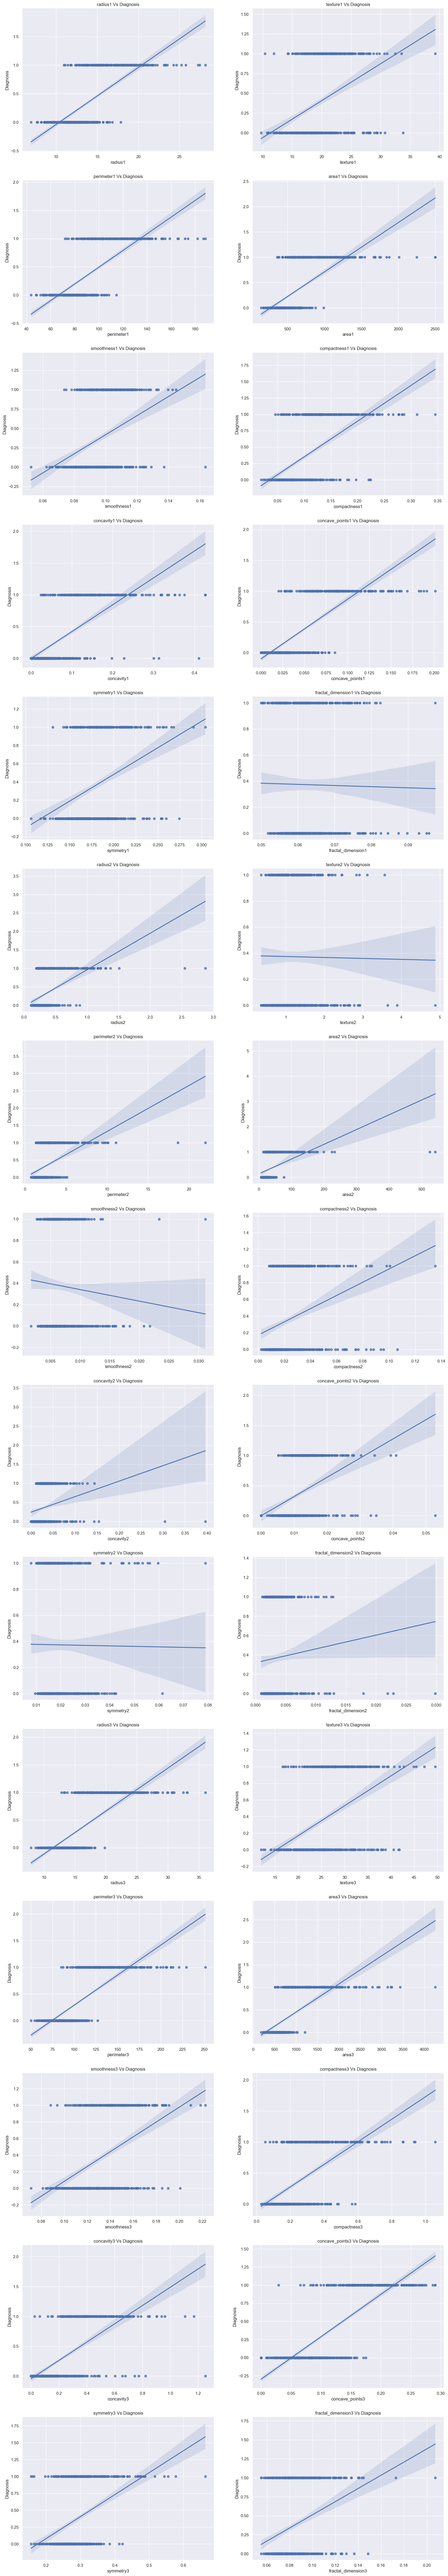

In [25]:
plt.figure(figsize=(20,130))
for i in enumerate(numerical_feature):
 plt.subplot(16, 2, i[0]+1)
 sns.set(rc={'figure.figsize':(8,10)})
 sns.regplot(data=data, x=i[1], y='Diagnosis')
 plt.xlabel(i[1])
 plt.ylabel("Diagnosis")
 plt.title("{} Vs Diagnosis".format(i[1]))

<h1 style="color: red;">5.0 Model Building</h1>
<h2 style="color: green;">5.1 splitting dataset in dependent(y) and independent feature(X)</h2>

In [26]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

## 5.2 Splitting data into Training and Test data

In [27]:
### random state train test split will be same with all people using random_state=19
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=19)
X_train.head()

radius1  texture1  perimeter1   area1  smoothness1  compactness1  \
394   12.100     17.72       78.07   446.2      0.10290       0.09758   
202   23.290     26.67      158.90  1685.0      0.11410       0.20840   
221   13.560     13.90       88.59   561.3      0.10510       0.11920   
103    9.876     19.40       63.95   298.3      0.10050       0.09697   
513   14.580     13.66       94.29   658.8      0.09832       0.08918   

     concavity1  concave_points1  symmetry1  fractal_dimension1  radius2  \
394     0.04783          0.03326     0.1937             0.06161   0.2841   
202     0.35230          0.16200     0.2200             0.06229   0.5539   
221     0.07860          0.04451     0.1962             0.06303   0.2569   
103     0.06154          0.03029     0.1945             0.06322   0.1803   
513     0.08222          0.04349     0.1739             0.05640   0.4165   

     texture2  perimeter2  area2  smoothness2  compactness2  concavity2  \
394    1.6520       1.869  22.22     0.008146       0.01631     0.01843   
202    1.5600       4.667  83.16     0.009327       0.05121     0.08958   
221    0.4981       2.011  21.03     0.005851       0.02314     0.02544   
103    1.2220       1.528  11.77     0.009058       0.02196     0.03029   
513    0.6237       2.561  37.11     0.004953       0.01812     0.03035   

     concave_points2  symmetry2  fractal_dimension2  radius3  texture3  \
394         0.007513    0.02015            0.001798    13.56     25.80   
202         0.024650    0.02175            0.005195    25.12     32.68   
221         0.008360    0.01842            0.002918    14.98     17.13   
103         0.011120    0.01609            0.003570    10.76     26.83   
513         0.008648    0.01539            0.002281    16.76     17.24   

     perimeter3   area3  smoothness3  compactness3  concavity3  \
394       88.33   559.5       0.1432        0.1773      0.1603   
202      177.00  1986.0       0.1536        0.4167      0.7892   
221      101.10   686.6       0.1376        0.2698      0.2577   
103       72.22   361.2       0.1559        0.2302      0.2644   
513      108.50   862.0       0.1223        0.1928      0.2492   

     concave_points3  symmetry3  fractal_dimension3  
394          0.06266     0.3049             0.07081  
202          0.27330     0.3198             0.08762  
221          0.09090     0.3065             0.08177  
103          0.09749     0.2622             0.08490  
513          0.09186     0.2626             0.07048

In [28]:
y_train.head()

394    0
202    1
221    0
103    0
513    0
Name: Diagnosis, dtype: int32

In [29]:
### both will have same shape
X_train.shape, y_train.shape

((426, 30), (426,))

In [30]:
### both will have same shape
X_test.shape, y_test.shape

((143, 30), (143,))

<h2 style="color: red;">5.3 Standardisation/ Feature scaling the dataset</h2>

In [31]:
### Creating a standard scaler object
scaler=StandardScaler()
### using fit_transform to Standardize the train data
X_train=scaler.fit_transform(X_train)
X_train

array([[-0.56320634, -0.33858826, -0.56197368, ..., -0.79907328,
         0.19452361, -0.75298811],
       [ 2.64669082,  1.73717104,  2.80948066, ...,  2.40906656,
         0.42875344,  0.16254587],
       [-0.14439938, -1.2245548 , -0.12317992, ..., -0.36896566,
         0.21967581, -0.15606649],
       ...,
       [-0.16161063, -1.50054962, -0.24414017, ..., -1.41681992,
        -1.03479003, -1.23716997],
       [-0.15013646, -1.11786773, -0.17031271, ...,  0.20826801,
         0.08133872, -0.65604281],
       [-0.83858626, -1.18512697, -0.84685594, ..., -1.15607479,
        -0.54903822, -0.78730021]])

In [32]:
### here using transform only to avoid data leakage
### (training mean and training std will be used for standardisation when we use transform)
X_test=scaler.transform(X_test)
X_test

array([[-2.96432044e-01, -1.76238373e-01, -3.72608310e-01, ...,
        -9.89910694e-01, -1.47495347e+00, -1.24969661e+00],
       [ 1.64270154e+00,  1.37768200e+00,  1.62073330e+00, ...,
         8.84499533e-01,  5.96958763e-01,  7.88828001e-04],
       [ 5.35299342e-02,  6.88854610e-01,  2.03412776e-01, ...,
         9.65220864e-01, -1.27738917e-01,  1.55572607e+00],
       ...,
       [-6.34919859e-01, -3.98889650e-01, -6.67501074e-01, ...,
        -3.61350443e-01,  2.76268250e-01, -7.93291208e-01],
       [-8.21375011e-01,  2.36337776e+00, -8.70630885e-01, ...,
        -1.75341264e+00, -2.13677066e+00, -1.39348064e+00],
       [ 2.31379464e-01, -5.82113097e-01,  2.96009938e-01, ...,
         1.33379751e+00,  1.03712221e+00,  1.19081961e+00]])

# 6.0 Model selection

<h2 style="color: orange;">1.0 Logistic Regression</h2>

In [33]:
### Creating a Logistic regression object
logistic_reg=LogisticRegression()
logistic_reg.fit(X_train,y_train)

LogisticRegression()

<h2 style="color: orange;">1.1 Using Above Model to get prediction for test data</h2> 

In [34]:
logistic_reg_pred=logistic_reg.predict(X_test)
logistic_reg_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1])

<h2 style="color: orange;">1.2.0 Performance Metrics</h2> 

<h2 style="color:yellow;"> 1.2.1 Confusion Matrix</h2>

In [35]:
confusion_mat=confusion_matrix(y_test, logistic_reg_pred)
confusion_mat

array([[83,  2],
       [ 3, 55]], dtype=int64)

<h2 style="color:yellow;"> 1.2.2 Accuracy score</h2>

In [36]:
### accuracy using accuracy_score
accuracy=round(accuracy_score(y_test, logistic_reg_pred),4)
accuracy

0.965

In [37]:
from sklearn.metrics import precision_score, recall_score
def evaluate_model(y_test, logistic_reg_pred):
    accuracy=round(accuracy_score(y_test, logistic_reg_pred),4)
    precision=precision_score(y_test, logistic_reg_pred)
    recall=recall_score(y_test, logistic_reg_pred)
    f1_score=2*(precision*recall)/(precision+recall)

    # Create a pandas DataFrame to store the results
    result_df = pd.DataFrame({
        "Metric": ["Accuracy score", "Precision score", "Recall score", "f1_score"],
        "Value": [accuracy, precision,recall ,f1_score ]
    })

    # Apply background color to the DataFrame
    background_color = 'black'  # Replace with your desired background color
    styles = [
        {'selector': '',
         'props': [('background-color', background_color), ('color', 'yellow')]}
    ]
    result_df = result_df.style.set_table_styles(styles, axis=0)
    
    return result_df

In [38]:
evaluate_model(y_test, logistic_reg_pred)

<h2 style="color:yellow;"> 1.2.6 Classification Report</h2>

In [39]:
print(classification_report(y_test, logistic_reg_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97        85
           1       0.96      0.95      0.96        58

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143



<h2 style="color: orange;">2.0 XgBoost</h2>

In [40]:
#importing model
import xgboost as xgb

In [41]:

# Initialize the XGBoost classifier
xg_model = xgb.XGBClassifier()
# Train the model on the training data
xg_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [43]:
# Make predictions on the test data
y_pred_xgb = xg_model.predict(X_test)

<h2 style="color: orange;">2.2.0 Performance Metrics</h2> 

<h2 style="color:yellow;"> 2.2.1 Confusion Matrix</h2>

In [45]:
confusion_mat1=confusion_matrix(y_test, y_pred_xgb)
confusion_mat1

array([[82,  3],
       [ 2, 56]], dtype=int64)

In [46]:
evaluate_model(y_test, y_pred_xgb)

<h2 style="color:yellow;"> 2.3 Classification Report</h2>

In [47]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        85
           1       0.95      0.97      0.96        58

    accuracy                           0.97       143
   macro avg       0.96      0.97      0.96       143
weighted avg       0.97      0.97      0.97       143



<h1 style="color: orange;">7.0 Saving the Model</h1>

In [49]:
### Writing model to a file that will be used while deployment
with open('model_Logistic_regression_breast_cancer.sav','wb') as f:
 pickle.dump(logistic_reg,f)